In [1]:
from fastai.tabular import *

In [2]:
path = 'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_original/'
path

'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_original/'

In [3]:
df = pd.read_csv(path + 'dataset_esquizotipia_original.csv')
df.head()

,ESTRES_PERCIBIDO,CSI_RESPROBL,CSI_REESTCOGN,CSI_APOYOSOC,CSI_EXPEMOC,CSI_EVITPROBL,CSI_PENSDESID,CSI_RETISOC,CSI_AUTOCRIT,ANSIEDADRASGO,...,SCL90_PSICOT,CAPE_POSIT_FREC,CAPE_POS_MALESTAR,CAPE_NEG_FREC,CAPE_NEG_MALESTAR,CAPE_DEPRE_FREC,CAPE_DEPRE_MALESTAR,TRAUMA_FRECUENCIA,TRAUMA_AFECTACION,SPQ_TOTAL_ESQUIZOT
0,23,17,5,0,0,7,5,13,2,20,...,0,24,4,14,0,8,0,4,8,0
1,22,13,11,3,10,6,11,17,11,17,...,9,22,2,29,33,11,3,9,29,0
2,10,20,20,20,16,11,8,3,0,20,...,5,30,9,29,21,10,2,12,25,1
3,7,12,1,0,7,4,6,3,1,18,...,0,20,0,16,2,8,0,4,10,0
4,31,8,9,17,13,4,14,2,6,27,...,17,35,13,36,26,19,19,17,48,2


In [4]:
procs = [FillMissing, Categorify, Normalize]

In [5]:
# se selecciona un 80% de los datos para entrenamiento y un 20% de los datos para validación
valid_idx  =  range ( len ( df ) - 57 ,  len ( df ))

In [6]:
# Se define la variable dependiente
dep_var  =  'SPQ_TOTAL_ESQUIZOT'

In [7]:
data = TabularDataBunch.from_df(path, df, dep_var, valid_idx=valid_idx, procs=procs)
print(data.train_ds.cont_names) # `cont_names` defaults to: set(df)-set(cat_names)-{dep_var}

['CAPE_NEG_FREC', 'CSI_REESTCOGN', 'CSI_AUTOCRIT', 'CSI_APOYOSOC', 'SCL90_DEPRE', 'ANSIEDADRASGO', 'CAPE_POSIT_FREC', 'TRAUMA_FRECUENCIA', 'TRAUMA_AFECTACION', 'SCL90_ANSIE', 'CSI_RESPROBL', 'CSI_PENSDESID', 'CSL90_HOSTIL', 'CSI_RETISOC', 'CSI_EXPEMOC', 'CSL90_SENS_INT', 'ESTRES_PERCIBIDO', 'CAPE_NEG_MALESTAR', 'SCL90_SOMAT', 'SCL90_PSICOT', 'CAPE_POS_MALESTAR', 'CAPE_DEPRE_MALESTAR', 'SCL90_ANS_FOB', 'CSI_EVITPROBL', 'SCL90_OBS_COMP', 'CAPE_DEPRE_FREC', 'SCL90_IDEA_PARAN']


In [8]:
(cat_x,cont_x),y = next(iter(data.train_dl))
for o in (cat_x, cont_x, y): print(to_np(o[:5]))

[0 0 0 0 0]
[[-0.762586 -1.328816 -0.555781 -1.415056 ... -0.979747 -0.978676 -1.247523 -0.899054]
 [ 1.102288 -1.328816  0.654704 -1.079429 ...  0.106226  1.374818  0.577926  1.02689 ]
 [ 0.569467  0.325982 -1.247486  0.095265 ... -0.762552 -0.657745  0.121564  0.641701]
 [ 0.169851  0.877581 -0.901634 -0.743802 ... -0.762552 -0.229837 -0.334799 -0.70646 ]
 [ 0.969083 -0.041751  0.654704  1.7734   ... -0.545358  0.198071 -0.106617 -0.899054]]
[0 1 1 0 0]


In [9]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)
learn.fit(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.996863,0.972284,0.631579,03:05
1,0.816792,0.954293,0.684211,02:59
2,0.722478,0.944463,0.684211,02:53
3,0.653193,0.889395,0.684211,02:45
4,0.610413,0.844616,0.684211,02:56


CAPE_NEG_FREC,CSI_REESTCOGN,CSI_AUTOCRIT,CSI_APOYOSOC,SCL90_DEPRE,ANSIEDADRASGO,CAPE_POSIT_FREC,TRAUMA_FRECUENCIA,TRAUMA_AFECTACION,SCL90_ANSIE,CSI_RESPROBL,CSI_PENSDESID,CSL90_HOSTIL,CSI_RETISOC,CSI_EXPEMOC,CSL90_SENS_INT,ESTRES_PERCIBIDO,CAPE_NEG_MALESTAR,SCL90_SOMAT,SCL90_PSICOT,CAPE_POS_MALESTAR,CAPE_DEPRE_MALESTAR,SCL90_ANS_FOB,CSI_EVITPROBL,SCL90_OBS_COMP,CAPE_DEPRE_FREC,SCL90_IDEA_PARAN,target,prediction
0.3031,-0.2256,0.6547,-1.0794,-0.0581,-0.1457,0.6420,0.2933,0.8081,-0.1922,-0.3240,-0.7051,0.4484,-0.1961,-1.7118,1.0002,0.8675,0.9705,-0.8431,0.6097,1.3670,0.8637,-0.6993,-0.3282,0.1981,0.3497,1.0269,1,1
0.3031,-0.5934,-0.9016,-0.9116,-0.3770,-0.1457,-0.3147,0.1049,-0.3432,-0.6718,-0.9271,-1.2034,0.0241,-1.0393,-0.5794,-0.2053,-0.0746,0.6075,-0.1643,0.0853,-0.5598,-0.6440,-0.6993,-0.7626,-0.1229,-0.5630,-0.3213,0,0
-1.4286,0.1421,0.8276,0.0953,-1.0148,-4.0316,-1.1120,-1.2139,-1.4518,-0.9116,-0.5250,-0.3729,-0.8246,0.6471,0.1755,-1.0089,0.9852,-1.4797,-1.0370,-0.8324,-1.0131,-1.3293,-0.6993,0.7578,-1.1926,-1.2475,-0.8991,1,0
0.8359,-0.7772,0.3089,-0.2404,-0.3770,-0.1457,-0.7931,0.0107,-0.4285,-0.6718,-0.5250,-0.2067,-0.6124,0.0147,0.1755,-0.6071,-0.0746,1.1520,-0.5522,-0.7013,-0.6731,0.8637,-0.5171,-0.1110,0.3050,0.5779,-0.7065,0,0
0.7027,-1.3288,0.1359,-0.4082,2.2539,0.6639,0.4825,-0.6487,-0.7696,1.3666,0.0781,1.2883,1.2971,0.2255,1.3079,0.3305,1.5740,0.6075,1.0963,0.7408,0.8003,1.1378,0.3938,-1.1969,1.5888,0.8061,0.8343,1,1


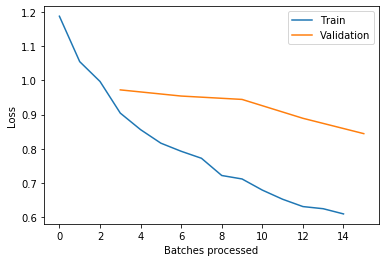

In [10]:
learn.recorder.plot_losses()
learn.show_results()